# Matplotlib: Applications
In the previous notebook (Matplotlib I), we covered some of the fundamental formatting options available in matplotlib. Familiarity with these concepts will be assumed for this notebook, but feel free to look back if you've forgotten keywords. For convenience, I'll include the same links in that notebook:

1. the latest [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
2. a page with [examples](https://matplotlib.org/gallery/index.html) that include source code for each plot
3. a page with additional [tutorials](https://matplotlib.org/tutorials/index.html) for the studious matplotlib student
4. another [matplotlib function index](https://matplotlib.org/api/pyplot_api.html) for an older version of matplotlib, but each function is defined on that page instead of requiring you click a link

We just scratched the surface of plotting functions in the previous notebook, so we'll take a look at some more advanced methods and techniques here. This will include a variety of plot types (1D/2D histograms, scatter w/ colorbars, contours, errorbars, among others) and advanced plot formatting (multi-panel, including empty panels, and adjusting system defaults with plt.rcParams). Since you've now gained experience with numpy, we'll introduce the object-oriented approach and use it from that point onward.

This notebook will have quite a bit more content than the previous one because the goal is to introduce plotting methods and provide examples rather than thoroughly explain them. I suggest you take a look at specific examples in more detail when you have time, and I hope they can act as a reference for you when you start research and need to creatively and effectively represent data.

### Let's get started!
**Note on the data import below:** The session on pandas hasn't happened yet, but we don't need to know much to make use of it in this notebook. We'll just use it to open the CSV file and keep the data in a neat, ordered 'spreadsheet' style data structure known as a DataFrame. Again, the details of DataFrames are beyond the scope of this notebook, but it'll prove useful for plotting multiple variables simultaneously.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('dr14_dwarfs_data.csv')

# * Showing off pandas, these lines can be skipped for now * 

# Show the first few rows of data
print(data.loc[:5])
print()

# Show the column named 'Teff', including some stats about it
print(data['Teff'])
print()

# Select a portion of the dataframe and print the length; in this case, entries with
# 1) log(g) > 4.0
# AND
# 2) [Fe/H] <= 0.0
print('N entries fitting the logical conditions:', len( data[(data['log(g)'] > 4.0) & (data['[Fe/H]'] <= 0.0)] ) )

      Teff   log(g)    [Fe/H]  [alpha/H]    [Mg/H]
0  5813.70  4.14752 -0.042253   0.038915 -0.061475
1  4702.87  2.71283 -0.466535  -0.238220 -0.169704
2  5020.88  3.60047 -0.117494  -0.080269 -0.018940
3  4316.88  4.39375  0.085802   0.070129  0.130215
4  6014.77  4.22835 -0.198442  -0.070751 -0.207519
5  5573.27  4.36723 -0.288222  -0.164892 -0.096717

0         5813.700000
1         4702.870000
2         5020.880000
3         4316.880000
4         6014.770000
             ...     
124021    4605.500000
124022    3682.399902
124023    4448.399902
124024    4620.899902
124025    4870.000000
Name: Teff, Length: 124026, dtype: float64

N entries fitting the logical conditions: 13221


## A basic HR diagram
Just to introduce the plot we'll work with in several of the examples below, here is an observer's Hertsprung-Russell diagram for our sample of 124,026 stars from a major spectroscopic survey (SDSS-IV APOGEE, for any interested). We have two new concepts introduced here:
1. `plt.plot(..., rasterized=True)`: rasterizes the points on the figure, but leaves the text and line arts as vectors; use this keyword when you have _a lot_ of scatter points so that the plot isn't huge and slow to load
2. `plt.gca().invert_xaxis()`: invert the x-axis; can also be done by flipping the order on the limits (`plt.xlim(larger#, smaller#)`, but if you're like me, you won't remember to do this when thinking of the limits and having this explicit calls helps me more easily understand my code

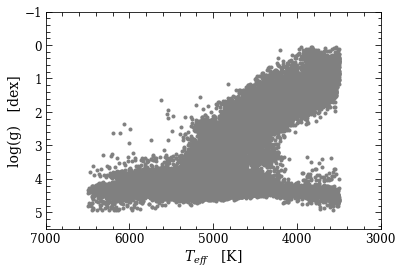

In [3]:
plt.plot(data['Teff'], data['log(g)'], ls='None', marker='.', color='gray', 
          rasterized=True)

plt.xlabel(r'$T_{eff}$   [K]', fontsize=14)
plt.ylabel(r'log(g)   [dex]', fontsize=14)

plt.xticks([3000, 4000, 5000, 6000, 7000], fontsize = 12)
plt.yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0], fontsize = 12)

plt.xlim(3000,7000)
plt.ylim(-1,5.5);


# Another way to flip the x and y axis to match what the literature typically does
plt.gca().invert_xaxis()
plt.gca().invert_yaxis();

# Automatically Setting Plot Formatting
There are a few ways to automate formatting changes in matplotlib. The first is to change the defaults that matplotlib uses for plot formatting. You'll probably settle on a collection of settings that you prefer for plots, which are useful to load in at the beginning of a python session so all your plots will receive those formatting options. There are a two easy ways to do this: 1) manually design a module with updates to plt.rcParams, and 2) use style sheets.
## Style Sheets
Stumped for ways to spruce up the color and formatting of your plot? Look no further than style sheets. A style sheet is basically a collection of formatting options all condensed into a single line of code for you. Check out [their reference page](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html) where you can see the various style sheets' colors and formatting for a variety of plot types. The cell below displays just a few of the available options.

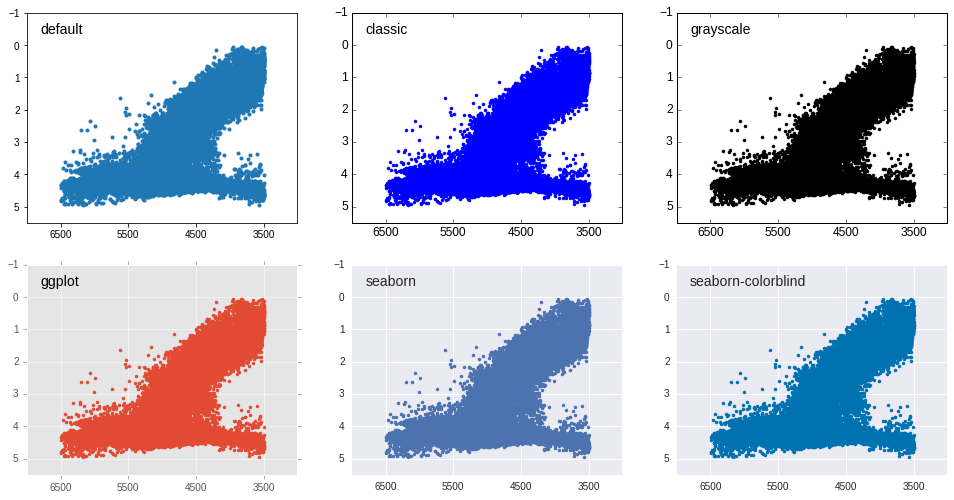

In [4]:
# Show an example of applying a style sheet to a plot

styles = ['default', 'classic', 'grayscale', 'ggplot', 'seaborn', 'seaborn-colorblind']

figss = plt.figure(figsize=(16.5,8.5))

for s, style in enumerate(styles):

    plt.style.use(style)
    
    axesss = figss.add_subplot(2, 3, s+1)

    axesss.plot(data['Teff'], data['log(g)'], ls='None', marker='.', rasterized=True)
    #axesss.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
    #axesss.set_ylabel(r'log(g)   [dex]', fontsize=14)
    axesss.set_xticks([3500, 4500, 5500, 6500])
    axesss.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
    axesss.set_xlim(3000,7000)
    axesss.set_ylim(-1,5.5);
    figss.gca().invert_xaxis()
    figss.gca().invert_yaxis()
    axesss.text(0.05, 0.9, style, fontsize=14, transform=axesss.transAxes)

plt.show()

## rcParams
rcParams provide an easy way to implement script-wide updates to your plot settings. For more info and to check out the _many_ other rcParam options, scroll through https://matplotlib.org/users/customizing.html. As an example, here are the updates from my "plotter_defaults_module.py" that are shown in the plots you'll see below:

``` python
import matplotlib.pyplot as plt

plt.rcdefaults()
plt.rcParams.update({'figure.autolayout':'True'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.major.size': 5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })
plt.rc('legend',**{'fontsize':'x-small'})
#plt.figure(1,figsize = [11.0, 8.5])
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':'True'})
plt.rcParams.update({'ytick.right':'True'})
# My own adds to Carles' rcParams updates
#plt.rcParams.update({'lines.markersize': 8}) 6 is the default
plt.rcParams.update({'legend.framealpha': 1.0})
plt.rcParams.update({'legend.fancybox': 'False'})
# To use my system's LaTEX rather than matplotlib's version--may give better results, but it's slower
#plt.rcParams.update({'text.usetex': 'True'})```

I can overrule these defaults for any given plot; they're just the defaults that matplotlib.pyplot will use. To overrule one of these, simply call `plt.rcParams.update({updated param here})` in a cell (I'll show an example of this later in the notebook).

Note: Most of my settings listed above work fine in all my applications, but one in particular I have to undo from time to time is `plt.rcParams.update({'figure.autolayout':'True'})`. While this is nice for trimming white space (remember `plt.savefig(..., facecolor='None')`?), it can also be a little ruthless and cut off colorbars on occasion. For extra-large plots, I just add `plt.rcParams.update({'figure.autolayout':'False'})` to the offending cell. Once I'm done with that plot and ready to move onto another, I add `plt.rcParams.update({'figure.autolayout':'True'})` at the top of the next cell I run, so that the rcParam is updated again.

In [5]:
import plotter_defaults_module

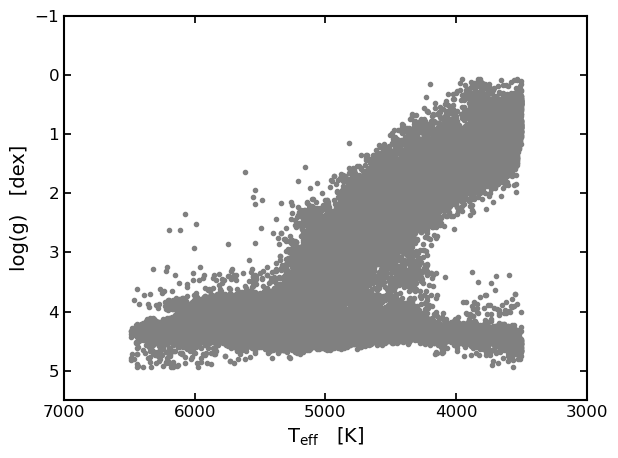

In [6]:
plt.plot(data['Teff'], data['log(g)'], ls='None', marker='.', color='gray', 
          rasterized=True)

plt.xlabel(r'$T_{eff}$   [K]', fontsize=14)
plt.ylabel(r'log(g)   [dex]', fontsize=14)

plt.xticks([3000, 4000, 5000, 6000, 7000], fontsize = 12)
plt.yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0], fontsize = 12)

plt.xlim(3000,7000)
plt.ylim(-1,5.5);

plt.gca().invert_xaxis()
plt.gca().invert_yaxis();

## Locators and Formatters

Previously, we supplied the tick values and labels for our axes to update the ones automatically chosen by matplotlib. Since it automatically selected them before, we know there exist automated means of choosing the ticks. These are through the `plt.Locator` ([docs](https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.Locator)) and `plt.Formatter` ([docs](https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.Formatter)) objects.

As the name suggests, Locators choose the location for the ticks. Here is a brief list of Locators:
- `plt.LinearLocator`: default: choose a suitable linear spacing
- `plt.LogLocator`: default for log plots: choose a suitable logarithmic spacing.
- `plt.IndexLocator`: default for index plots (where x = range(len(y)))
- `plt.NullLocator`: no ticks (this is the default for minor ticks)
- `plt.FixedLocator`: specify fixed tick locations
- `plt.MultipleLocator`: ticks at a multiple of the given number
- `plt.MaxNLocator`: ticks at no more than N locations at nice interrvals
- `plt.AutoMinorLocator`: dynamically find ideal minor tick locations based on major ticks; scale must be linear and major ticks must be evenly spaced

Formatters alter the tick labels in an algorithmic way. Here is a brief list of Formatters:
- `plt.ScalarFormatter`: default -- choose the best format
- `plt.LogFormatter`: default for log plots
- `plt.NullFormatter`: no tick labels
- `plt.FixedFormatter`: a fixed list of tick labels
- `plt.FuncFormatter`: a function which returns a label
- `plt.FormatStrFormatter`: label derived from a format string: "t=%i"
- `plt.StrMethodFormatter`: use new-style format string (str.format()) to set the label
- `plt.PercentFormatter`: format tick labels as percentages
- `plt.EngFormatter`: format tick values to have prefixes for powers of 1000 and units--MHz, nm, kg

I'm not going to include explicit examples for most of these, but I still wanted to mention the wide variety available. I do use `plt.MultipleLocator` near the end of the notebook, so keep an eye out for it!

# Two Approaches: Object-Oriented vs. Scripted
So far, everything we've done has been in the scripted interface. This is often useful for beginners, as it can feel a little more intuitive and resembles the MATLAB commands that matplotlib is based upon. When working in a single Jupyter cell, it maintains a pointer to the current figure, which allows you to instantiate and modify a single figure at a time.

The object-oriented interface can be a bit intimidating at first, but it's also more powerful and more flexible than the scripted. We can do everything we did in the previous notebook and this one in the object-oriented interface, as shown in the next two cells.

### Scripted
The plot from before...

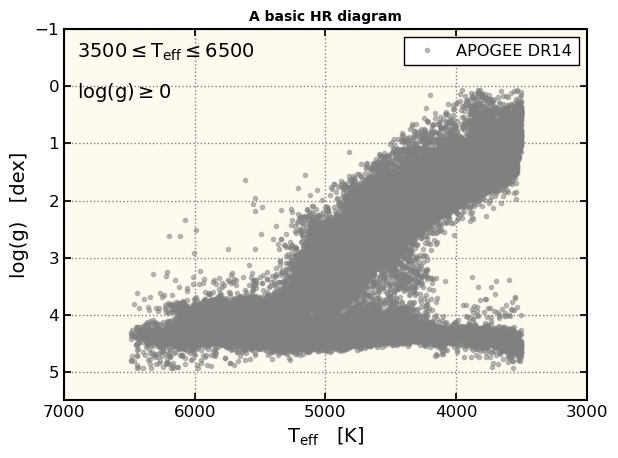

In [7]:
# A plot in scripted

plt.plot(data['Teff'], data['log(g)'], ls='None', marker='.', color='gray', alpha=0.5, 
          rasterized=True, label='APOGEE DR14')

# Legend
plt.legend(fontsize='small', ncol=1, numpoints=1, fancybox=False, 
           frameon=True, edgecolor='black', loc='upper right')

plt.xlabel(r'$T_{eff}$   [K]', fontsize=14)
plt.ylabel(r'log(g)   [dex]', fontsize=14)

plt.xticks([3000, 4000, 5000, 6000, 7000], fontsize = 12)
plt.yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0], fontsize = 12)

plt.xlim(3000,7000)
plt.ylim(-1,5.5)

# Title
plt.title('A basic HR diagram', {'fontsize':10, 'fontweight':'bold'}, loc='center', color='black')

# Text
plt.text(6900, 0.2, r'log(g)$\geq0$', fontsize=14, color='black')
plt.text(6900, -0.5, r'$3500\leq T_{eff}\leq6500$', fontsize=14, color='black')

# Grid
plt.grid(True, which='major', axis='both', ls=':', lw=1, color='gray')

# Facecolor
ax = plt.gca()
ax.set_facecolor('floralwhite')


# Another way to flip the x and y axis to match what the literature typically does
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.show()

### Object-Oriented
This time, we'll instantiate the figure using a new command: `plt.subplots()` ([docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)). Some of its most useful keywords:
- `nrow`: integer, number of rows for the figure; default 1
- `ncol`: integer, number of columns for the figure; default 1
- `figsize`: tuple with 2 floats, (width, height) size of the figure **in inches**; default is 6.4" x 4.8", my go-to is 5.5" x 4.25" (so 4 plots would take up a standard page) and I increase it by ~1" for a colorbar or other feature that adds to the size
- `sharex`: bool or one of the strings 'none', 'all', 'row', 'col'; controls whether the x-axes share limits/ticks, where True/'all' have the same behavior, as does False/'none', and 'row' and 'column' control which groups share axes properties
- `sharey`: bool or one of the strings 'none', 'all', 'row', 'col'; same as above but acting on the y-axes

We'll alter the figure size for now, and the sharex/sharey keywords will be shown later in the notebook.

We can also easily edit the major ticks as well as add/format minor ones with the `axes.tick_params()` function, as shown below.

We can also make the `plt.text(x,y,...)` locations independent of the axis limits. We first provide relative coordinates, such as `plt.text(0.05, 0.9,...)` for upper left corner, or 0.8 and 0.2 for lower right, and so on. Then add `plt.text(..., transform=axes.transAxes)`. This means I can consistently place the text in a location, even if the axes limits change, especially when looping over a multi-panel plot.

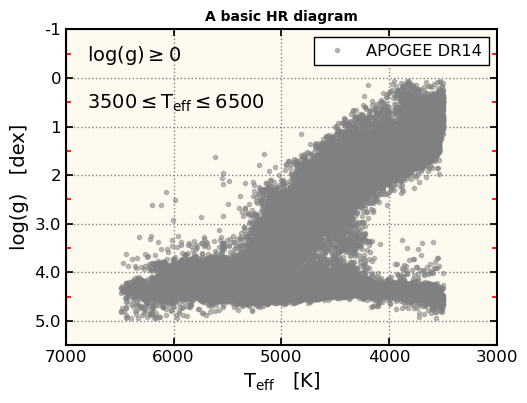

In [8]:
# The same plot in object-oriented

# Major change here!
# We instantiate the figure and save it to these variable names
fig, axes = plt.subplots(1, 1, figsize=(5.5,4.25))


# From here on, we change plt to axes

# Main plotting call: basically the same
axes.plot(data['Teff'], data['log(g)'], ls='None', marker='.', color='gray', alpha=0.5, 
          rasterized=True, label='APOGEE DR14')


# Legend: basically the same
axes.legend(fontsize='small', ncol=1, numpoints=1, fancybox=False, 
           frameon=True, edgecolor='black', loc='upper right')


# For many of the plot attributes, we change the function name from fname to set_fname, with a few exceptions

# Axes labels: just change to set_
axes.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes.set_ylabel(r'log(g)   [dex]', fontsize=14)


# Axes ticks
# Notice how we set the location of the ticks with set_xticks, then set the labels on those ticks and their
# properties with set_xticklabels, supplying a dictionary for the properties like when setting a title
axes.set_xticks([3000, 4000, 5000, 6000, 7000])
axes.set_xticklabels([3000, 4000, 5000, 6000, 7000], fontsize=12)

axes.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axes.set_yticklabels([-1, 0, 1, 2, 3.0, 4.0, 5.0], fontsize=12)
# Want minor ticks? It's easy to add these, too
axes.set_yticks([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], minor=True)
# Adjust the length with 'size' for either axes' major or minor ticks
axes.tick_params(axis='y', colors='red', which='minor', width=1.25, size=3.25)


# Axes limits: just change to set_
axes.set_xlim(3000,7000)
axes.set_ylim(-1,5.5)


# Title: just change to set_
axes.set_title('A basic HR diagram', {'fontsize':10, 'fontweight':'bold'}, loc='center', color='black')


# Text: change to use relative units (0-1)
axes.text(0.05, 0.9, r'log(g)$\geq0$', fontsize=14, color='black', transform=axes.transAxes)
axes.text(0.05, 0.75, r'$3500\leq T_{eff}\leq6500$', fontsize=14, color='black', transform=axes.transAxes)


# Grid: basically no change here
axes.grid(True, which='major', axis='both', ls=':', lw=1, color='gray')


# Facecolor: basically no change here
axes.set_facecolor('floralwhite')


# Just change plt.gca to axes!
axes.invert_xaxis()
axes.invert_yaxis()

plt.show()

## So which approach is better?
There are draws to each approach. The object-oriented interface is a bit more powerful than the scripted, though the scripted can be faster to mock up figures when you want a quick glance at data.

That said, the object-oriented approach becomes easier the more you practice using it. It's also considered best practice to use the object-oriented interface, as it makes code cleaner and easier to follow. I highly recommend you try to primarily use the object-oriented approach in your future work. The sooner you start working in it, the more time you'll save in the long-run.

# Common Plotting Functions
Below, I'll briefly introduce a variety of plotting functions and useful variations on them, in some cases. I won't document the keywords in detail, so take a look at the documentation for these functions and build off these examples in your own work!

## Histograms: `axes.hist()` [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)
Create a histogram of data. You'll need to supply the data to be binned and the bins you'd like it to use.

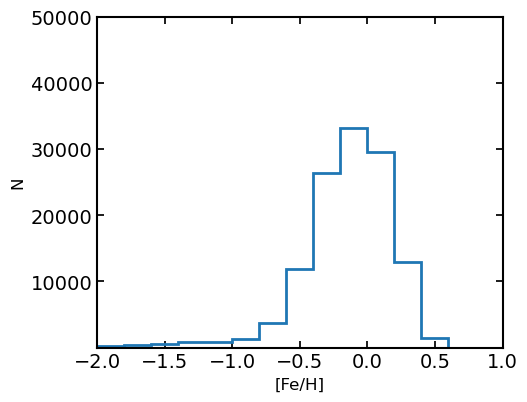

In [9]:
fighist, axeshist = plt.subplots(1, 1, figsize=(5.5, 4.25))

# Bins for the histogram
fehbins = np.linspace(-2,1,16)

axeshist.hist(data['[Fe/H]'], bins=fehbins, histtype='step', linewidth=2)

axeshist.set_xlabel(r'[Fe/H]', fontsize=12)
axeshist.set_ylabel(r'N', fontsize=12)
axeshist.set_xlim(-2,1)
axeshist.set_ylim(1e0,5e4)

# Log scaling often makes histograms more readable
# axeshist.set_yscale('log', basey=10)

plt.show()

### Normalized histogram
Define weights based on the histogram values, so the bin with the most points peaks at y = 1.0

/home/aibhleog/programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


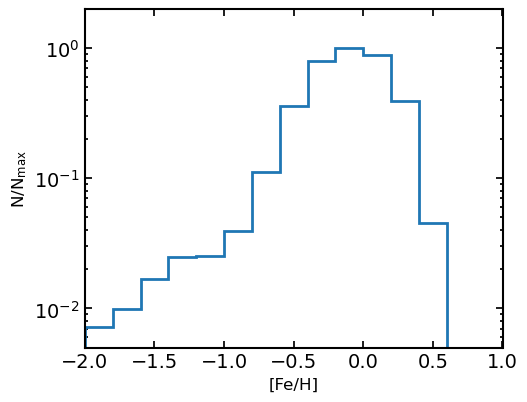

In [10]:
fignhist, axesnhist = plt.subplots(1, 1, figsize=(5.5, 4.25))

hist, _ = np.histogram(data['[Fe/H]'], bins=fehbins)
weights = np.ones(len(data))/float(np.max(hist))

axesnhist.hist(data['[Fe/H]'], bins=fehbins, weights=weights, histtype='step', linewidth=2)

axesnhist.set_xlabel(r'[Fe/H]', fontsize=12)
axesnhist.set_ylabel(r'$N/N_{max}$', fontsize=12)
axesnhist.set_xlim(-2,1)
axesnhist.set_ylim(5e-3,2e0)
axesnhist.set_yscale('log', basey=10)

plt.show()

### Cumulative histogram
Each bin contains a growing percentage of the total population, with the final bin (`cumulative=1`) or first bin (`cumulative=-1`) containing 100% of the sample.

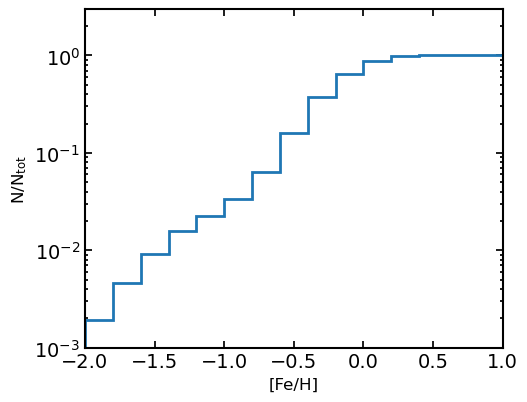

In [11]:
figchist, axeschist = plt.subplots(1, 1, figsize=(5.5, 4.25))

axeschist.hist(data['[Fe/H]'], bins=fehbins, histtype='step', linewidth=2, cumulative=1, density=True, lw=2,)

axeschist.set_xlabel(r'[Fe/H]', fontsize=12)
axeschist.set_ylabel(r'$N/N_{tot}$', fontsize=12)
axeschist.set_xlim(-2,1)
axeschist.set_ylim(1e-3,3e0)

axeschist.set_yscale('log', base=10)

plt.show()

## Errorbars: `axes.errorbar()` [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html#matplotlib.pyplot.errorbar)
Useful for showing error bars, but can also be used to indicate bin ranges--i.e., data that is techincally binned but you're plotting the marker at the midpoint. The example belows shows bin ranges on the horizontal (xerr) bars and an uncertainty on the vertical (yerr) bars. You can change the marker with the `fmt` keyword, and you can change the color and size of the caps and stems that actually make up the error bars. The legend entries include the error bars, which can clutter your legend, so I've included a StackOverflow solution to remove the stems and caps from just the legend entries.

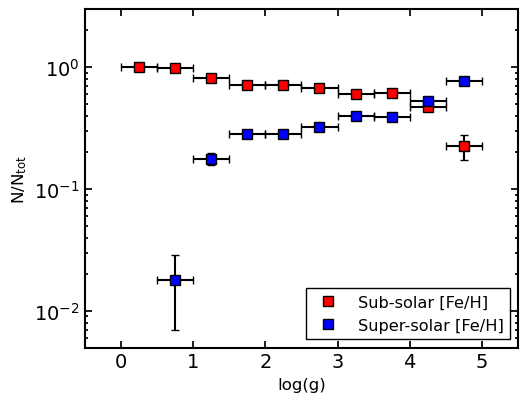

In [12]:
from matplotlib import container

# These will be our x error bars as we bin the data across log(g)
logg_bins = np.linspace(0.0, 5.0, 11)
# Since they're evenly spaced, it's straightforward to find the midpoints of the bins
logg_mid = logg_bins[:-1] + (logg_bins[1] - logg_bins[0])/2.

# Initiate several arrays for our data
pts_sub, pts_sup, pts_tot = np.zeros(len(logg_bins)-1), np.zeros(len(logg_bins)-1), np.zeros(len(logg_bins)-1)

for l in range(len(logg_bins)-1):
    # Split the data into log(g) slices
    df_slice = data[(data['log(g)'] >= logg_bins[l]) & (data['log(g)'] < logg_bins[l+1])]
    
    # Identify the number of stars with low or high [Fe/H]
    pts_sub[l] = len(df_slice.loc[df_slice['[Fe/H]'] < 0.0])
    pts_sup[l] = len(df_slice.loc[df_slice['[Fe/H]'] > 0.0])
    pts_tot[l] = len(df_slice)

    
# An estimate for statistical uncertainty, scaled up by 5 because it was too small to show before (large sample!)
binomial_noise_sub = 5*np.sqrt((pts_sub/pts_tot)*(1-pts_sub/pts_tot)/pts_tot)
binomial_noise_sup = 5*np.sqrt((pts_sup/pts_tot)*(1-pts_sup/pts_tot)/pts_tot)


# Time to plot

figerr, axeserr = plt.subplots(1, 1, figsize=(5.5, 4.25))

# If you pass a single value for each point into xerr/yerrr, it'll make symmetric errorbars (like in yerr below)
# Otherwise, pass the left side's value first, then the right side (like in xerr)
axeserr.errorbar(logg_mid, pts_sub/pts_tot, xerr=[logg_mid-logg_bins[:-1], logg_bins[1:]-logg_mid], 
                 yerr=binomial_noise_sub, fmt='s', ms=7, color='red', mec='black' , 
                 ecolor='black', capsize=3, label='Sub-solar [Fe/H]')

axeserr.errorbar(logg_mid, pts_sup/pts_tot, xerr=[logg_mid-logg_bins[:-1], logg_bins[1:]-logg_mid], 
                 yerr=binomial_noise_sup, fmt='s', ms=7, color='blue', mec='black' , 
                 ecolor='black', capsize=3, label='Super-solar [Fe/H]')

axeserr.set_xlabel(r'log(g)', fontsize=12)
axeserr.set_ylabel(r'$N/N_{tot}$', fontsize=12)
axeserr.set_xlim(-0.5,5.5)
axeserr.set_ylim(5e-3,3e0)

axeserr.set_yscale('log', base=10)

axeserr.legend(fontsize='small', ncol=1, numpoints=1, fancybox=False, 
               frameon=True, edgecolor='black', loc='lower right')

# Remove the caps on the legend entries to declutter it
handles, labels = axeserr.get_legend_handles_labels()
leg = axeserr.get_legend()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

axeserr.legend(new_handles, labels, fontsize='small', ncol=1, numpoints=1, fancybox=False, 
               frameon=True, edgecolor='black', loc='lower right')


plt.show()

## Contours: `axes.contour()` [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour) and `axes.contourf()` [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf)
Useful for showing high-density regions, since points will blend and not show depth well. Also useful for show confidence regions. Pass in a 2D histogram and define the extent and levels.

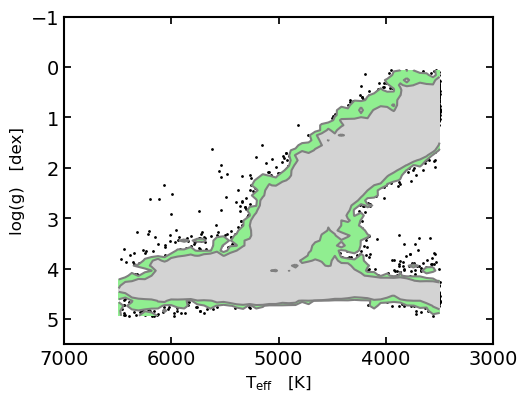

In [13]:
# We'll need this to define the 1 sigma and 2 sigma regions
import scipy.stats as stats

# Quick hist to base the contour lines on
simpler_hist, xs, ys = np.histogram2d(data['Teff'], data['log(g)'], bins=50)

figcon, axescon = plt.subplots(1,1, figsize = [5.5, 4.25])

# Scatter points
axescon.plot(data['Teff'], data['log(g)'], ls='None', marker='.', 
             ms=2, color='black', rasterized=True, zorder=1)

# Establish the contour lines--here, 68% and 99% confidence regions
axescon.contour(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
                levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2)], 
                colors='gray', zorder=3)

# Fill in the contour lines 
axescon.contourf(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
                 levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2), 1e5], 
                 colors=['lightgreen', 'lightgray'], zorder=2)

# Remainder of plot settings
axescon.set_xlabel(r'$T_{eff}$   [K]', fontsize=12)
axescon.set_ylabel(r'log(g)   [dex]', fontsize=12)
axescon.set_xticks([3000, 4000, 5000, 6000, 7000])
axescon.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axescon.set_xlim(3000,7000)
axescon.set_ylim(-1,5.5)
figcon.gca().invert_xaxis()
figcon.gca().invert_yaxis()

## Colorbars
A well-designed colorbar is an easy way to add dimensionality to your plot without cluttering it. Choosing the right colormap, keyword `cmap`, is particularly important, so you may have to try a few to find the best color scheme and type of map for your data; check out this [list of colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). There are many plot types with which a colorbar pairs well, so I'll go over several examples below.

## `plt.scatter()` [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)
Essentially, plt.plot() for data with 3 dimensions: _x_,_y_, and _c_, where _c_ controls the color. Change the marker shape with `marker` but change the size with ```s```. Change the colormap with `cmap`, and set limits on the colorbar's extent with `vmin` and `vmax`.

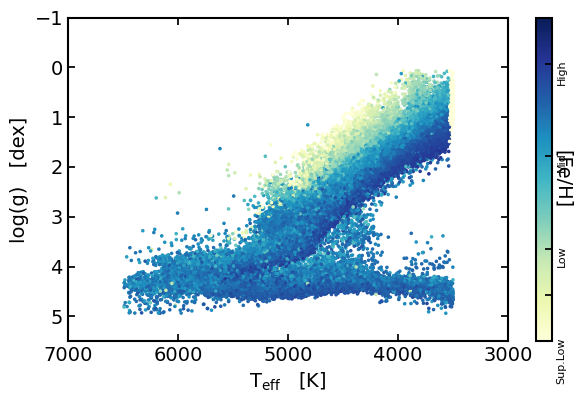

In [14]:
figscat, axesscat = plt.subplots(1,1, figsize = [6.5, 4.25])

# axes.scatter() call
hrscat = axesscat.scatter(data['Teff'], data['log(g)'], s=2.5, c=data['[Fe/H]'], 
                          vmin = -2.5, vmax = 1.0, cmap='YlGnBu', rasterized=True)

# Instantiate and format the colorbar
cbar_scat = figscat.colorbar(hrscat, ticks=[-2.5, -2, -1.5, -0.5, 0.5])
cbar_scat.set_label('[Fe/H]', fontsize=14, rotation=270)
cbar_scat.ax.set_yticklabels(['Sup.Low', '', 'Low', 'Mid', 'High'], fontsize=8, rotation=90)


axesscat.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axesscat.set_ylabel(r'log(g)   [dex]', fontsize=14)
axesscat.set_xticks([3000, 4000, 5000, 6000, 7000])
axesscat.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axesscat.set_xlim(3000,7000)
axesscat.set_ylim(-1,5.5)
figscat.gca().invert_xaxis()
figscat.gca().invert_yaxis()

## 2D histograms: `plt.hist2d()` [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html#matplotlib.pyplot.hist2d)
The first function is very easy to implement and resembles its 1D cousin quite a bit. Its returns are (counts, xedges, yedges, Image). To add a colorbar, we need to pass the 4th component, Image. A very useful keyword is `cmin`: any bin with less than `cmin` isn't plotted. This way, we can easily display a 2D histogram in the most dense regions and other plots that are better suited for the outskirts.

Let's combine a 2D histogram with the previous two plots to make a type of figure often seen in SDSS papers.

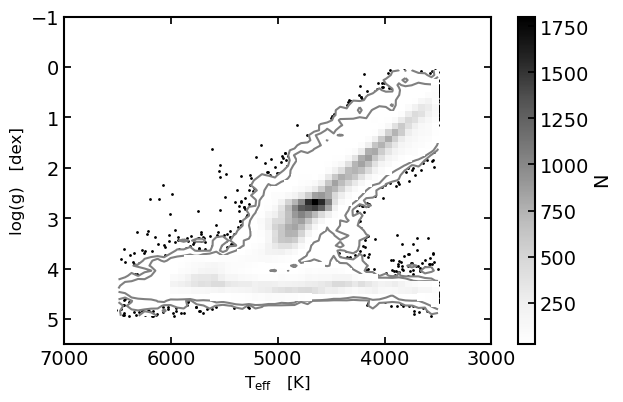

In [15]:
figsdss, axessdss = plt.subplots(1,1, figsize = [6.5, 4.25])

# Scatter points
axessdss.plot(data['Teff'], data['log(g)'], ls='None', marker='.', 
              ms=2, color='black', rasterized=True, zorder=1)

# Establish the contour lines--here, 68% and 99% confidence regions
axessdss.contour(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
                 levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2)], 
                 colors='gray', zorder=3)

# Fill in the contour lines 
axessdss.contourf(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
                  levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2), 1e5], 
                  colors=['white', 'white'], zorder=2)

# Bins for the 2D histogram
xbins_sdss = np.linspace(3500, 6000, 41)
ybins_sdss = np.linspace(0,5,41)

# Histogram plotting command; any bin with less than 25 isn't plotted by hist2d
sdss_hist = axessdss.hist2d(data['Teff'], data['log(g)'], bins=[xbins_sdss, ybins_sdss], 
                            range=[[3500,6000],[0.0,5.0]], cmin=25, cmap='Greys', zorder=4)

# Add a colorbar
cbar_sdss = figsdss.colorbar(sdss_hist[3])
cbar_sdss.set_label(r'$N$')


# Remainder of plot settings
axessdss.set_xlabel(r'$T_{eff}$   [K]', fontsize=12)
axessdss.set_ylabel(r'log(g)   [dex]', fontsize=12)
axessdss.set_xticks([3000, 4000, 5000, 6000, 7000])
axessdss.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axessdss.set_xlim(3000,7000)
axessdss.set_ylim(-1,5.5)
figsdss.gca().invert_xaxis()
figsdss.gca().invert_yaxis()

plt.show()

### Log scaling a colorbar
Use `matplotlib.colors.LogNorm()` to change the colorbar's scale to log by including it in your plotting function under the `norm` kwarg. You can pass optional `vmin` and `vmax` keywords to change the minimum and maximum values on the new colorbar.

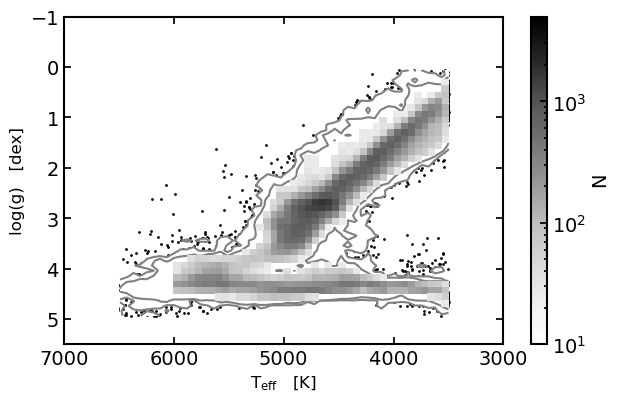

In [16]:
import matplotlib.colors as colors

figsdsslog, axessdsslog = plt.subplots(1,1, figsize = [6.5, 4.25])

# Scatter points
axessdsslog.plot(data['Teff'], data['log(g)'], ls='None', marker='.', 
              ms=2, color='black', rasterized=True, zorder=1)

# Establish the contour lines--here, 68% and 99% confidence regions
axessdsslog.contour(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
                 levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2)], 
                 colors='gray', zorder=3)

# Fill in the contour lines 
axessdsslog.contourf(simpler_hist.T, extent=[xs.min(), xs.max(), ys.min(), ys.max()], 
                     levels=[stats.chi2.ppf(1-0.32,2),stats.chi2.ppf(1-0.01,2), 1e5], 
                     colors=['white', 'white'], zorder=2)


# Histogram plotting command with log scaling
sdss_histlog = axessdsslog.hist2d(data['Teff'], data['log(g)'], bins=[xbins_sdss, ybins_sdss], 
                                  range=[[3500,6000],[0.0,5.0]], cmin=25, cmap='Greys',
                                  norm=colors.LogNorm(vmin=10, vmax=5000), zorder=4)

# Add a colorbar
cbar_sdsslog = figsdsslog.colorbar(sdss_histlog[3])
cbar_sdsslog.set_label(r'$N$')


# Remainder of plot settings
axessdsslog.set_xlabel(r'$T_{eff}$   [K]', fontsize=12)
axessdsslog.set_ylabel(r'log(g)   [dex]', fontsize=12)
axessdsslog.set_xticks([3000, 4000, 5000, 6000, 7000])
axessdsslog.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axessdsslog.set_xlim(3000,7000)
axessdsslog.set_ylim(-1,5.5)
figsdsslog.gca().invert_xaxis()
figsdsslog.gca().invert_yaxis()

plt.show()

## 2D colorbar: `plt.pcolormesh()` [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html#matplotlib.pyplot.pcolormesh)
Useful if you need to pass your own calculated values for the colorbar data, rather than just a 2D histogram. This is the faster cousin of `plt.pcolor()`.

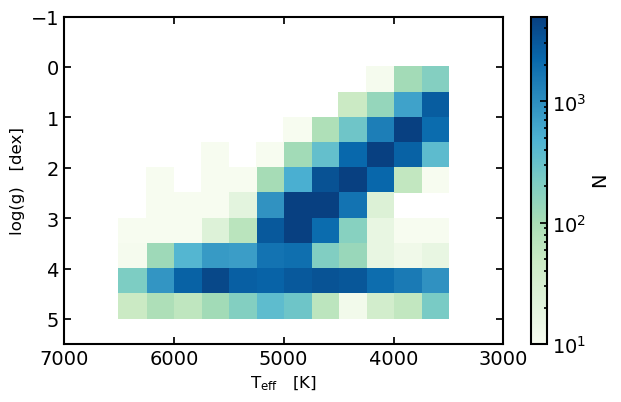

In [17]:
# We'll do the binning and histogram ourselves

xvals = [3500, 6500]
yvals = [0.0, 5]

xbins = np.linspace(3500., 6500., 13)
ybins = np.linspace(0., 5., 11)

full_ap_vals, _, _, = np.histogram2d(data['Teff'], data['log(g)'], 
                                     bins=[xbins, ybins], range=[xvals,yvals])
full_ap_vals = full_ap_vals.T


figpclr, axespclr = plt.subplots(1, 1, figsize = (6.5, 4.25))

pcall = axespclr.pcolormesh(xbins, ybins, full_ap_vals, norm=colors.LogNorm(vmin=10, vmax=5000), cmap='GnBu')

cbar_pclr = figpclr.colorbar(pcall)
cbar_pclr.set_label(r'$N$')

# Remainder of plot settings
axespclr.set_xlabel(r'$T_{eff}$   [K]', fontsize=12)
axespclr.set_ylabel(r'log(g)   [dex]', fontsize=12)
axespclr.set_xticks([3000, 4000, 5000, 6000, 7000])
axespclr.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axespclr.set_xlim(3000,7000)
axespclr.set_ylim(-1,5.5)
figpclr.gca().invert_xaxis()
figpclr.gca().invert_yaxis()

plt.show()

## 2D Images: `plt.imshow()` [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow)

### 2D Histogram
This function can do many things, perhaps least of which is dispaly 2D histograms. While it affords us a lot of flexibility, it can also be a pain to get the extent and ticks right, so do make sure your plot is best represented this way before wrangling with it. Note that the return is an Image object, so we can pass that directly to the colorbar.

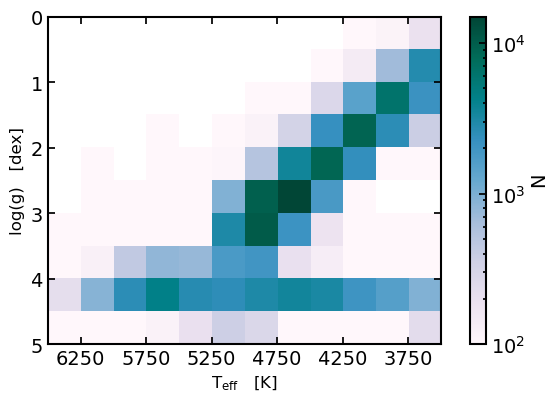

In [18]:
# Because imshow is weird
correct_direc = np.fliplr(np.flipud(full_ap_vals))


figimsh, axesimsh = plt.subplots(1,1, figsize = [6.5, 4.25])

# Note the order of the extent--this flips the axes
# Also note that you may have to play with the aspect keyword to get the colorbar to line up with the plot edges
dens = axesimsh.imshow(correct_direc, extent=(6500, 3500, 5.0, 0), origin='lower', 
                    aspect=500, interpolation='nearest', cmap='PuBuGn', norm=colors.LogNorm(vmin=100, vmax=15000))

cbar_imsh = figimsh.colorbar(dens)
cbar_imsh.set_label(r'$N$')

axesimsh.set_xlabel(r'$T_{eff}$   [K]', fontsize=12)
axesimsh.set_ylabel(r'log(g)   [dex]', fontsize=12)

# Note that we have to be careful with these
axesimsh.set_xticks([3750, 4250, 4750, 5250, 5750, 6250])
axesimsh.set_yticks([0, 1.0, 2.0, 3.0, 4.0, 5.0])

plt.show()

### Images
We can also read in images and look at the colors within them using `cmap`.

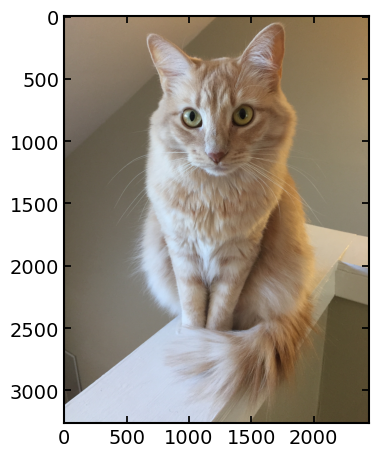

In [19]:
img = plt.imread('cat.jpg')
img.shape

figpic, axespic = plt.subplots()
plt.imshow(img);

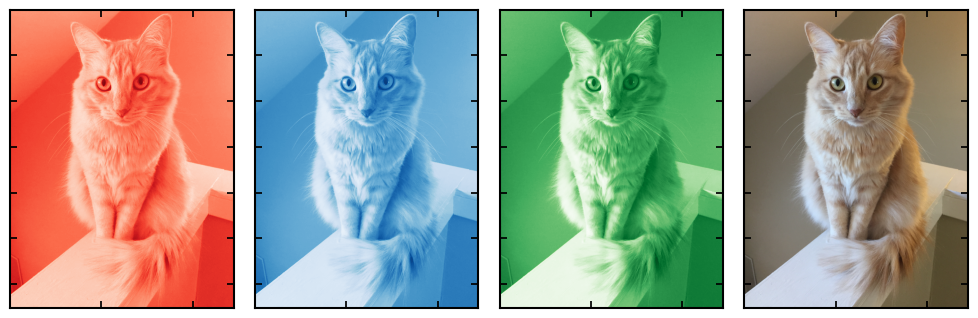

In [20]:
figpicclr, axespicclr = plt.subplots(1,4, figsize=(10,6))
axespicclr[0].imshow(img[:, :, 0], cmap="Reds_r")
axespicclr[1].imshow(img[:, :, 1], cmap="Blues_r")
axespicclr[2].imshow(img[:, :, 2], cmap="Greens_r")
axespicclr[3].imshow(img);
for a in axespicclr:
    a.set_xticklabels([])
    a.set_yticklabels([])

## Multi-Panel Plots
There are a few ways to create multi-panel plots, one of which we've already seen. I'll also include another method below, which tends to be useful for specific types of plots.

### ```plt.subplots()``` [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)
### Shared axes

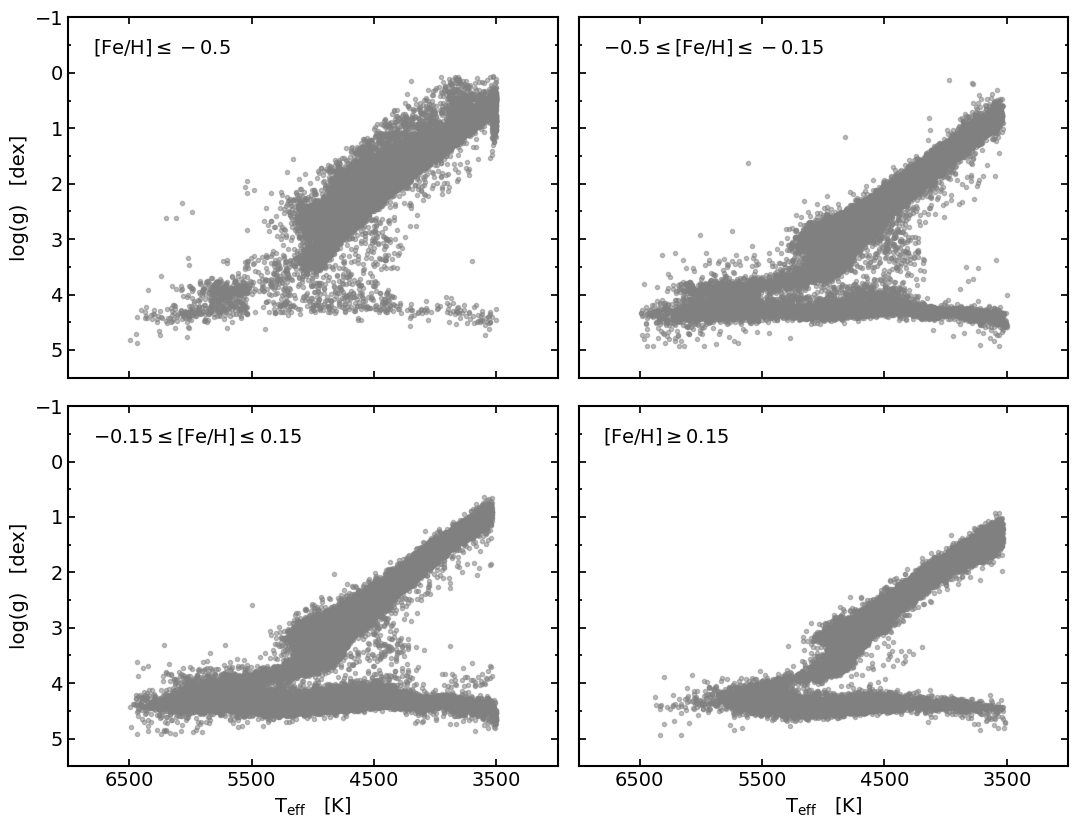

In [21]:
# Create the figure with shared axes
fig4pan, axes4pan = plt.subplots(2, 2, figsize=(11,8.5), sharex=True, sharey=True)


# Go ahead and format the axes; all of these params will get shared
axes4pan[0,0].set_xticks([3500, 4500, 5500, 6500])
axes4pan[0,0].set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axes4pan[0,0].set_yticks([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], minor=True)
axes4pan[0,0].set_xlim(3000,7000)
axes4pan[0,0].set_ylim(-1,5.5)
axes4pan[0,0].invert_xaxis()
axes4pan[0,0].invert_yaxis()


# Notice I label each axis that I want labeled (may not want the interior ones labeled)
axes4pan[1,0].set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes4pan[1,1].set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axes4pan[0,0].set_ylabel(r'log(g)   [dex]', fontsize=14)
axes4pan[1,0].set_ylabel(r'log(g)   [dex]', fontsize=14)


# Define my data samples using pandas
low_feh = data[data['[Fe/H]'] < -0.5]
med_feh = data[(data['[Fe/H]'] >= -0.5) & (data['[Fe/H]'] < -0.15)]
sol_feh = data[(data['[Fe/H]'] >= -0.15) & (data['[Fe/H]'] < 0.15)]
hgh_feh = data[data['[Fe/H]'] >= 0.15]

# Handy text for each panel
text = [r'[Fe/H]$\leq-0.5$', 
        r'$-0.5\leq$[Fe/H]$\leq-0.15$', 
        r'$-0.15\leq$[Fe/H]$\leq0.15$', 
        r'[Fe/H]$\geq0.15$']

# So I can write a for loop for the axes.plot() and axes.text() calls
dfs = [low_feh, med_feh, sol_feh, hgh_feh]
plt_panels = [[0,0], [0,1], [1,0], [1,1]]

# Actual plotting commands and additional text
for p, df in enumerate(dfs):
    row = plt_panels[p][0]
    col = plt_panels[p][1]
    
    axes4pan[row,col].plot(df['Teff'], df['log(g)'], ls='None', marker='.', color='gray', alpha=0.5, 
          rasterized=True)
    
    axes4pan[row,col].text(0.05, 0.9, text[p], transform = axes4pan[row,col].transAxes )


#fig4pan.subplots_adjust(wspace=0, hspace=0)
    
plt.show()

### Without shared axes

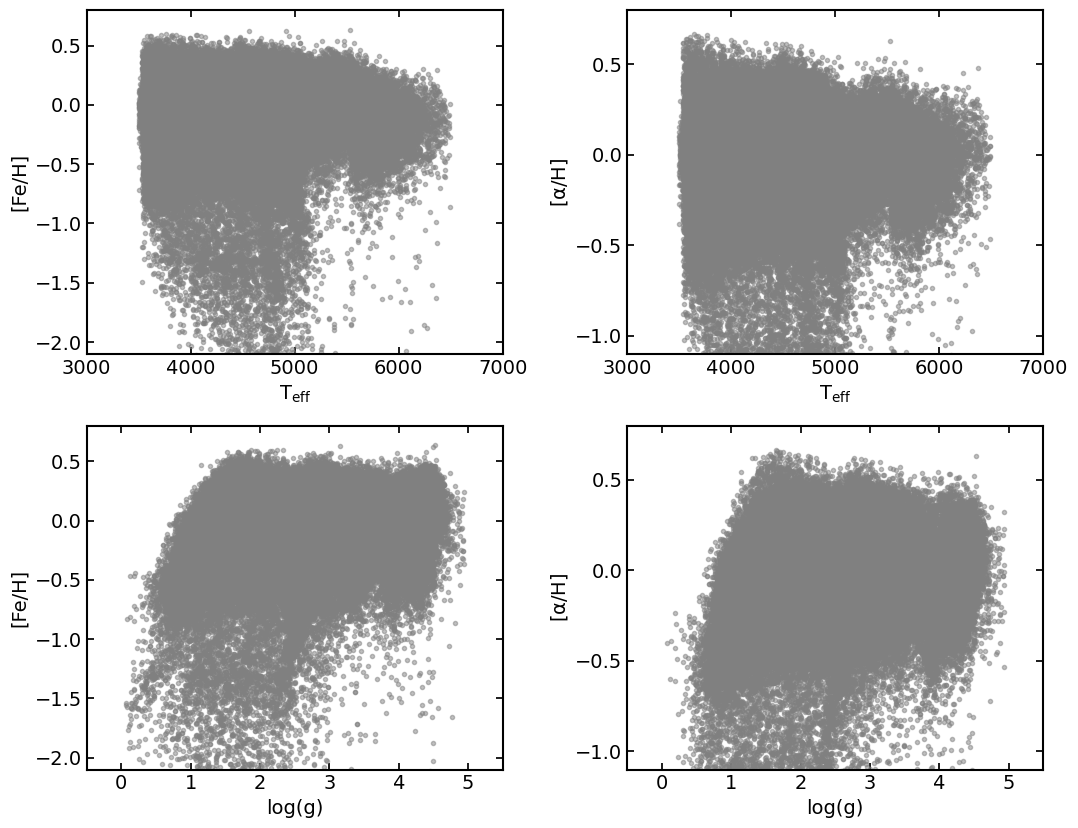

In [22]:
# Create a figure without shared axes
fig4par, axes4par = plt.subplots(2, 2, figsize=(11,8.5))

params = ['Teff', 'log(g)', '[Fe/H]', '[alpha/H]']
param_lab = [r'$T_{eff}$', 'log(g)', '[Fe/H]', r'[$\alpha$/H]']
limits = [[3000,7000], [-0.5,5.5], [-2.1,0.8], [-1.1, 0.8]]

for x in range(2):
    for y in range(2,4):
        row = x
        col = y-2
        
        axes4par[row,col].plot(data[params[x]], data[params[y]], ls='None', marker='.', color='gray', alpha=0.5, 
          rasterized=True)
        
        axes4par[row,col].set_xlabel(param_lab[x])
        axes4par[row,col].set_ylabel(param_lab[y])
        axes4par[row,col].set_xlim(limits[x][0], limits[x][1])
        axes4par[row,col].set_ylim(limits[y][0], limits[y][1])
        
        # An example where using a Locator can be useful!
        axes4par[row,col].yaxis.set_major_locator(plt.MultipleLocator(0.5))

### ```fig.add_axes()``` [docs](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_axes)
There are two compelling cases for this command, so I'll show examples of each. The four positional arguments ```fig.add_axes([lcl, lcb, w, h])``` go as such:
1. lcl: left corner placement, relative to the left-hand side, in normalized axes units (INAU)
2. lcb: left corner placement, relative to the bottom of the plot, INAU
3. w: width INAU
4. h: height INAU

### Inset Plots
These are neat, _but_ beware: it is fairly inoften that an inset is truly warranted in a publication figure, whereas it is guaranteed that you will spend hours of your life formatting an inset to your liking. Carefully weigh this risk-reward ratio for your situation. Make sure to account for tick and axes labels when apportioning space for the inset.

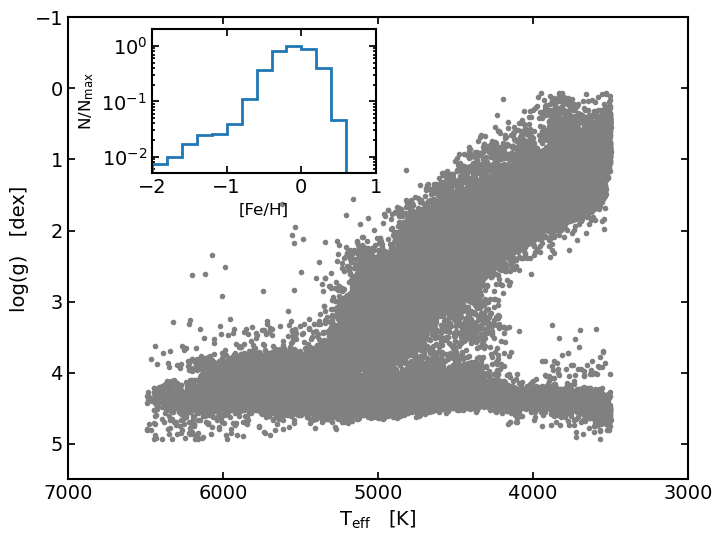

In [23]:
plt.rcParams.update({'figure.autolayout':'False'})

figinset, axesinset = plt.subplots(1,1, figsize = [8, 6])

axesinset.plot(data['Teff'], data['log(g)'], ls='None', marker='.', color='gray', rasterized=True)
axesinset.set_xlabel(r'$T_{eff}$   [K]', fontsize=14)
axesinset.set_ylabel(r'log(g)   [dex]', fontsize=14)
axesinset.set_xticks([3000, 4000, 5000, 6000, 7000])
axesinset.set_yticks([-1, 0, 1.0, 2.0, 3.0, 4.0, 5.0])
axesinset.set_xlim(3000,7000)
axesinset.set_ylim(-1,5.5)
# Flip the x and y axis to match what the literature typically does
figinset.gca().invert_xaxis()
figinset.gca().invert_yaxis()


# 1) left corner placement, relative to the left-hand side, in normalized axes units (INAU)
# 2) left corner placement, relative to the bottom of the plot, INAU
# 3) width INAU
# 4) height INAU
inset = figinset.add_axes([0.23, .62, .28, .24])

hist_in, _ = np.histogram(data['[Fe/H]'], bins=fehbins)
ws_in = np.ones(len(data))/float(np.max(hist_in))

inset.hist(data['[Fe/H]'], bins=fehbins, weights=ws_in, histtype='step', linewidth=2)

inset.set_xlabel(r'[Fe/H]', fontsize=12)
inset.set_ylabel(r'$N/N_{max}$', fontsize=12)
inset.set_xlim(-2,1)
inset.set_ylim(5e-3,2e0)
inset.set_yscale('log', base=10)

plt.show()

### Colorbar + Multi-Panel
There are two ways I've found to do this. One way is via the ```fig.add_axes``` function, where we then supply the additional axes object as the coloraxes ```cax```' kwarg: ```fig.colorbar(..., cax=ax_object)```.

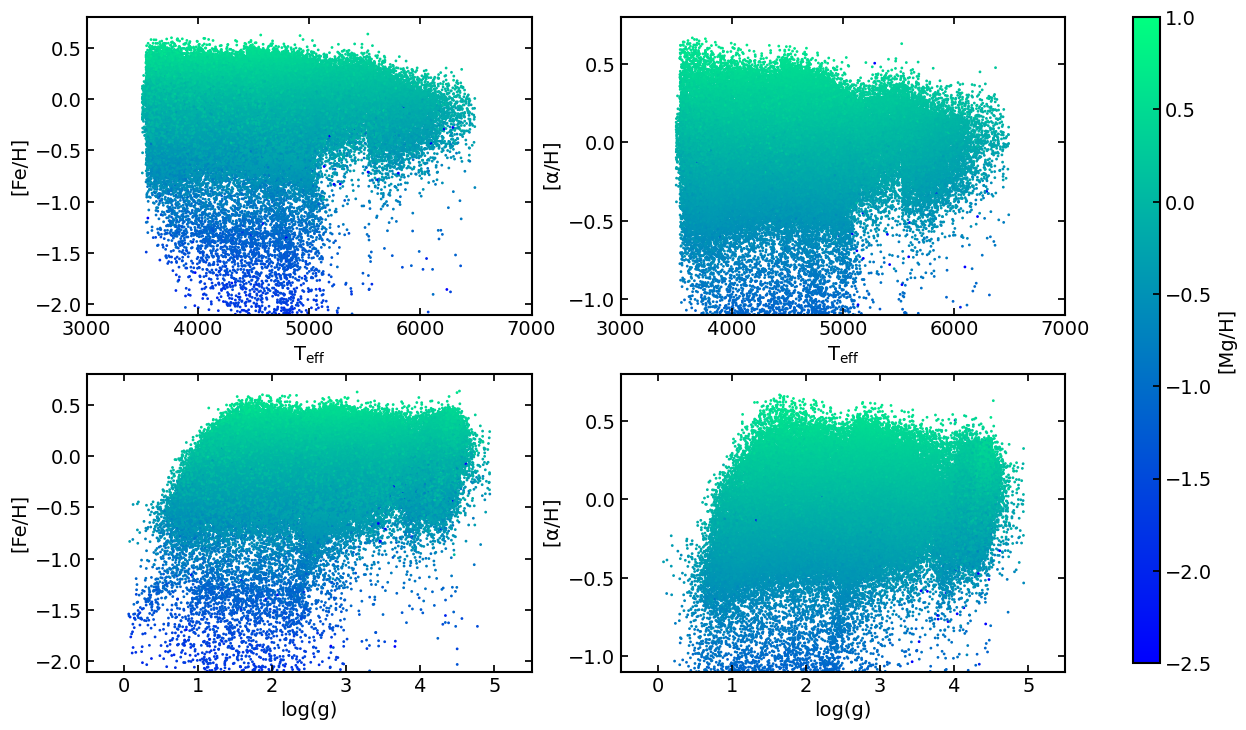

In [24]:
fig4parclr, axes4parclr = plt.subplots(2, 2, figsize=(13.5,8.5))

for x in range(2):
    for y in range(2,4):
        row = x
        col = y-2
        
        sct_plt = axes4parclr[row,col].scatter(data[params[x]], data[params[y]], s=4, marker='.', 
                                               c=data['[Mg/H]'], vmin=-2.5, vmax=1.0, 
                                               cmap='winter', rasterized=True)
        if (x == 0) and (y == 2):
            
            # Adjust the main plot to give room for another axes
            fig4parclr.subplots_adjust(right=0.85)
            # Add an additional axes object for the colorbar
            cbar_ax = fig4parclr.add_axes([0.9, 0.12, 0.02, 0.76])
            # Instatiate the colorbar and format it
            cbar_met = fig4parclr.colorbar(sct_plt, cax=cbar_ax)
            cbar_met.set_label(r'[Mg/H]')
        
        axes4parclr[row,col].set_xlabel(param_lab[x])
        axes4parclr[row,col].set_ylabel(param_lab[y])
        axes4parclr[row,col].set_xlim(limits[x][0], limits[x][1])
        axes4parclr[row,col].set_ylim(limits[y][0], limits[y][1])
        
        axes4parclr[row,col].yaxis.set_major_locator(plt.MultipleLocator(0.5))

plt.show()

### Note
You can also do this via the ```ax``` keyword, supplying a raveled list of the axes. With this, you don't have to adjust the figure to add space for a colorbar axes.

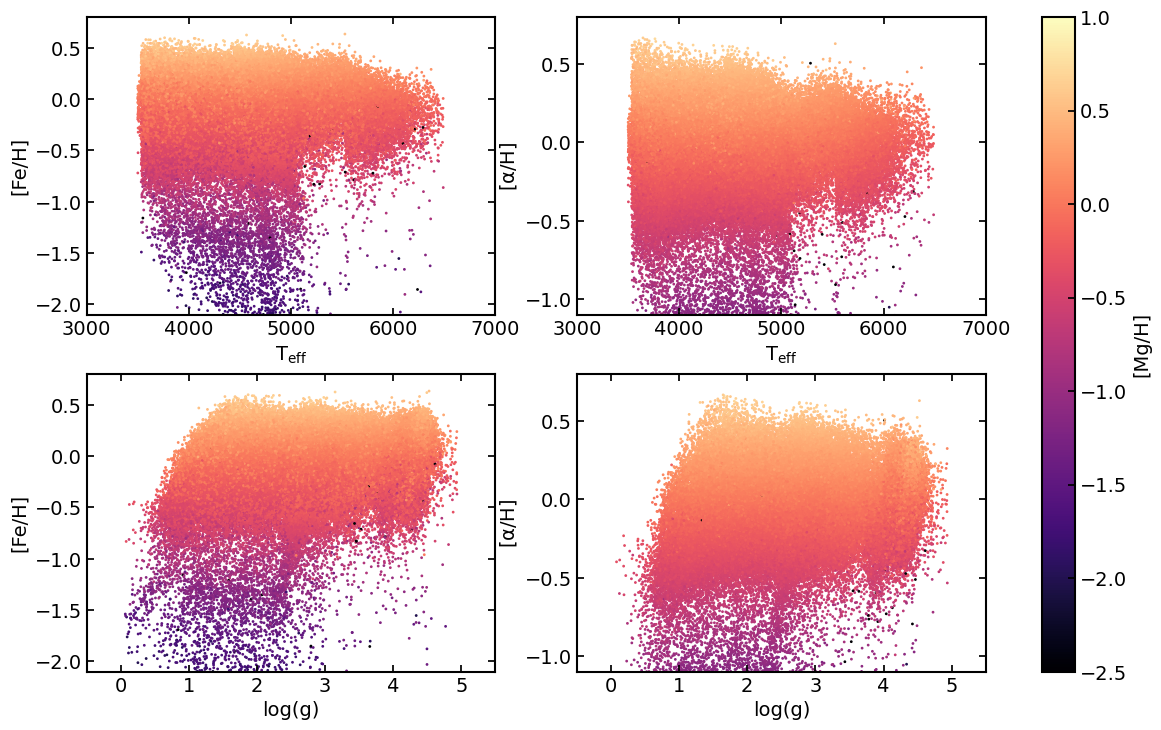

In [25]:
fig4parclr2, axes4parclr2 = plt.subplots(2, 2, figsize=(14.5,8.5))

for x in range(2):
    for y in range(2,4):
        row = x
        col = y-2
        
        sct_plt = axes4parclr2[row,col].scatter(data[params[x]], data[params[y]], s=4, marker='.', 
                                                c=data['[Mg/H]'], vmin=-2.5, vmax=1.0, 
                                                cmap='magma', rasterized=True)
        if (x == 0) and (y == 2):
            # Instantiate the colorbar and format it
            cbar_met2 = fig4parclr2.colorbar(sct_plt, ax=axes4parclr2.ravel().tolist())
            cbar_met2.set_label(r'[Mg/H]')
        
        axes4parclr2[row,col].set_xlabel(param_lab[x])
        axes4parclr2[row,col].set_ylabel(param_lab[y])
        axes4parclr2[row,col].set_xlim(limits[x][0], limits[x][1])
        axes4parclr2[row,col].set_ylim(limits[y][0], limits[y][1])
        
        axes4parclr2[row,col].yaxis.set_major_locator(plt.MultipleLocator(0.5))

plt.show()

### Final tips on multi-panel plots

You can adjust the individual panels' positions with ```fig.subplots_adjust(left=#, right=#, bottom=#, top=#, hspace=#, wspace=#)``` ([docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html#matplotlib.pyplot.subplots_adjust))

You can also use ```fig.add_subplot()``` ([docs](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot)) and ```plt.GridSpec()``` ([docs](https://matplotlib.org/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec)) to add extra panels; see code cell below (_code credit:_ [this notebook](https://github.com/bmorris3/2014_fall_ASTR599/blob/master/notebooks/12_AdvancedMatplotlib.ipynb)) or the cell near the top of this notebook that covered style sheets.

The [corner](https://corner.readthedocs.io/en/latest/) package by Dan Foreman-Mackey and company is a nice resource allows you to make pretty corner/triangle plots without worrying about the for loops necessary to format and plot them. While it has several options for plot types, it's not nearly as versatile as matplotlib. However, you can go into the [source code](https://github.com/dfm/corner.py), find the code you need to make and format the corner plot, and then copy/paste to make the plot yourself. You can then add any additional features (say, a colorbar) and edit the formatting yourself. It is doable (speaking from experience) and having their source code made the formatting infinitely easier, even if I couldn't use their actual package.

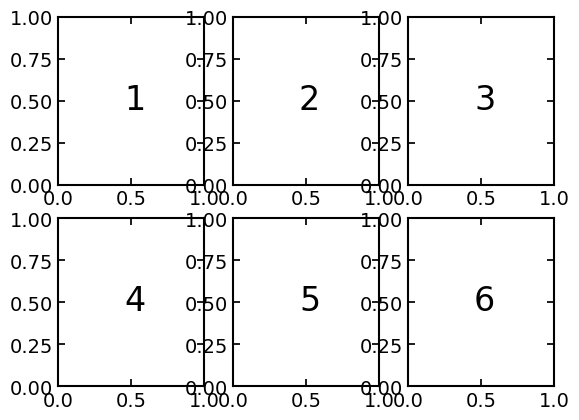

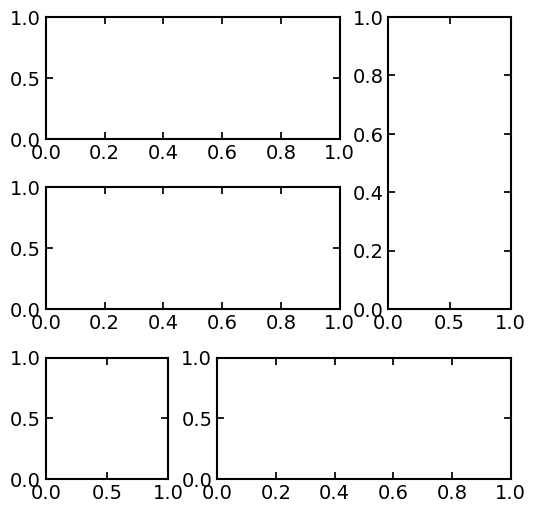

In [26]:
# Using fig.add_subplot()
figas = plt.figure()
for i in range(1, 7):
    axas = figas.add_subplot(2, 3, i)
    axas.text(0.45, 0.45, str(i), fontsize=24)

# Using plt.GridSpec()
gs = plt.GridSpec(3, 3, wspace=0.4, hspace=0.4)
figgs = plt.figure(figsize=(6, 6))

figgs.add_subplot(gs[1, :2])
figgs.add_subplot(gs[0, :2])
figgs.add_subplot(gs[2, 0])
figgs.add_subplot(gs[:2, 2])
figgs.add_subplot(gs[2, 1:])

plt.show()

Here's another way to visualize how that works -- it's a beta feature offered by matplotlib (still experimental, [link to documentation](https://matplotlib.org/stable/tutorials/provisional/mosaic.html#sphx-glr-tutorials-provisional-mosaic-py)).

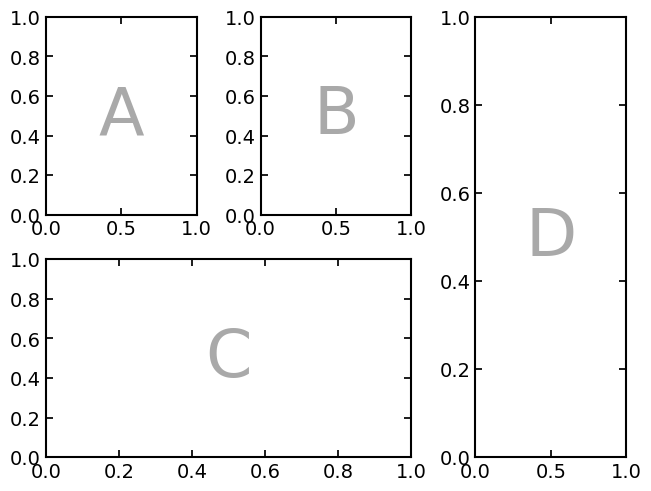

In [34]:
from see_subplots import identify_axes
    
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    ABD
    CCD
    """
)

identify_axes(axd) # just adds the letter to the subplots to show you how it works!

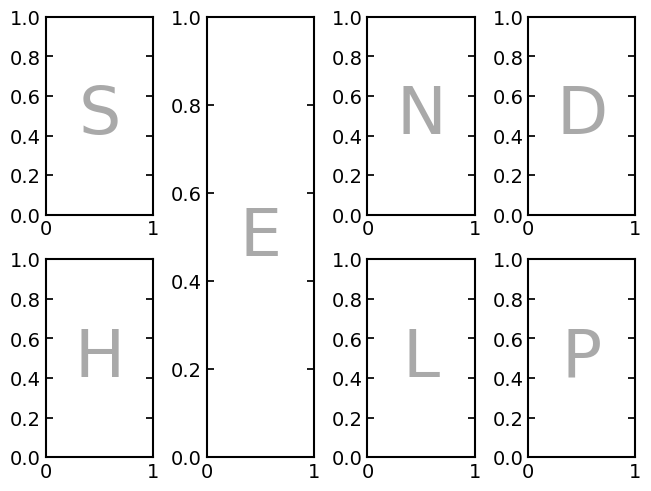

In [28]:
# saw this one on Twitter and it made me laugh:

axd = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    SEND
    HELP
    """
)

identify_axes(axd) # just adds the letter to the subplots to show you how it works!

# But there's more...
This notebook covered some of the more common plot types, but there are still plenty of plotting functions that weren't even mentioned, so I'll mention them down here:

`plt.fill_between` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html#matplotlib.pyplot.fill_between) and `plt.fill_betweenx` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_betweenx.html#matplotlib.pyplot.fill_betweenx): for filling between a specified set of points; useful for plotting uncertainties on lines

`plt.axhspan` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axhspan.html#matplotlib.pyplot.axhspan) and `plt.axvspan` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvspan.html#matplotlib.pyplot.axvspan): create colored rectangles, so basically `plt.axhline` + `plt.fill_between` (and their y companions)

`plt.bar` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) and `plt.barh` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh): create a bar plot

`plt.hexbin` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hexbin.html#matplotlib.pyplot.hexbin): make a 2D histogram but the bins are shaped like hexagons (cool!)

`plt.pie` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie): for when you don't want to open Word to make a pie chart

`plt.plot_surface` [doc](https://matplotlib.org/tutorials/toolkits/mplot3d.html#mpl_toolkits.mplot3d.Axes3D.plot_surface): plot 3D surfaces

`plt.polar` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.polar.html#matplotlib.pyplot.polar): make a polar plot (r, &theta;)

`plt.stackplot` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.stackplot.html#matplotlib.pyplot.stackplot): histograms with `plt.hist` can be stacked to an extent, but this is the official way to make stacked plots

`plt.streamplot` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.streamplot.html#matplotlib.pyplot.streamplot): make streamlines of vector flows

`plt.twinx` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.twinx.html#matplotlib.pyplot.twinx) and `plt.twiny` [doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.twiny.html#matplotlib.pyplot.twiny): produce and format a second axis, which will appear on the opposite side of its 'twin' axis

# Exercises

### Exercise 1
Pick one of the plots covered earlier. Choose one of the style sheets from the [reference page](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html#sphx-glr-gallery-style-sheets-style-sheets-reference-py) that you think works well with the plot you chose and implement it in a cell. In a separate cell, now try to change the formatting yourself until you like the way it looks; this can include adding vertical/horizontal lines, grids, text, titles, etc. If time allows, we'll share our results with one another!



In [ ]:
# Add a style sheet to a plot here

In [ ]:
# Format the plot yourself here

### Exercise 2
Glance at the plots listed above in the "But there's more" section. Choose one that you think you can adapt to the data file provided with this notebook and see if you can get it working. You have your experience from this session, the matplotlib documentation, the rest of the session attendees, and Google to help you get it working. If you're happy with your results, ask to share your screen!

In [ ]:
# Try to get a new plot working here